<a href="https://colab.research.google.com/github/Mohadese-ghayoomi/EulerProjectSolution/blob/master/Elearning_Exercise_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Import Libraries**

In [1]:
%tensorflow_version 2.x 
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os
print('Version is',tf.__version__)


Version is 2.2.0-rc3


# **Data Preprocessing**

**importing the Dataset** 

In [2]:
from google.colab import drive; drive.mount('/content/drive')
os.getcwd()
%cd /content/drive/My Drive/Colab Notebooks
from datasets import MNISTDataset


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


**Splitting the datasets into the Training set and Test set**


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape, train_labels.shape)
data = MNISTDataset(train_images.reshape([-1, 784]), train_labels, 
                    test_images.reshape([-1, 784]), test_labels,
                    batch_size=128)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


# **Assign Class name to data**

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# **Preprocess the Data**

(60000, 28, 28)
(60000,)
10000


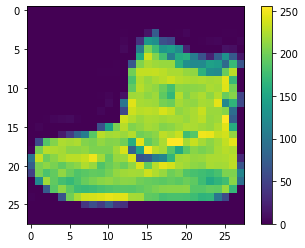

In [5]:
# The Pixel values in Range 0 to 255
print(train_images.shape)
print(train_labels.shape)
print(len(test_images))
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()

# **Convert the range of numbers between 0 and 1 before feeding to the network**

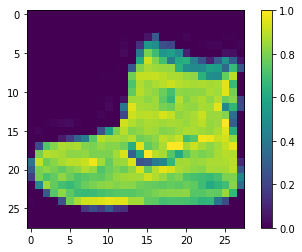

In [6]:
#Divided the Values by 255
train_images = train_images / 255.0
test_images = test_images / 255.0
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()

# **Building the ANN**

**Initialising the ANN**

In [0]:
# create an object of the sequential class(sequential class which creates a new ANN as a sequence of layers)
ann =tf.keras.models.Sequential()

**Adding the input layer and first hidden layer**

In [0]:
#only reformats the Data (two dimensional array to one)
ann.add(tf.keras.layers.Flatten(input_shape=(28,28)))
#Dense class create the fully connection between the input layer and first hidden layer
#rectify activation function is the activation function for fully connection between input layer and the first layer 
ann.add(tf.keras.layers.Dense(units = 128, activation='relu' ))

**Adding second hidden layer**

In [0]:
#second layer connected automatically to first layer 
ann.add(tf.keras.layers.Dense(units = 128, activation='relu' ))

**Adding the output Layer**

In [10]:
# more than 2 categories at the end, so we should softmax
ann.add(tf.keras.layers.Dense(units = 10, activation='softmax'))
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# **Training the ANN**

**Compiling the ANN**

In [0]:
# Adding a few setting during the model compile step 
#1.Loss function(measure the accuracy of the model, it has to minimize )
#2.Optimizer(Updating the model on the basis of observed data and the loss function)
#3.Metrics(monitor the training and testing steps)
ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Training the ANN model on the Training set**

In [12]:
# train_lable is the dependent variable vectore of the training set 
# train_image is the matrix of features the training set 
# over each epoch the loss is slightly reduced
ann.fit(train_images, train_labels, batch_size=10 , epochs=50)

Epoch 1/50
6000/6000 [==============================] - 11s 2ms/step - loss: 0.4748 - accuracy: 0.8264
Epoch 2/50
6000/6000 [==============================] - 11s 2ms/step - loss: 0.3671 - accuracy: 0.8634
Epoch 3/50
6000/6000 [==============================] - 11s 2ms/step - loss: 0.3336 - accuracy: 0.8768
Epoch 4/50
6000/6000 [==============================] - 11s 2ms/step - loss: 0.3110 - accuracy: 0.8860
Epoch 5/50
6000/6000 [==============================] - 11s 2ms/step - loss: 0.2970 - accuracy: 0.8905
Epoch 6/50
6000/6000 [==============================] - 11s 2ms/step - loss: 0.2844 - accuracy: 0.8930
Epoch 7/50
6000/6000 [==============================] - 11s 2ms/step - loss: 0.2720 - accuracy: 0.8978
Epoch 8/50
6000/6000 [==============================] - 11s 2ms/step - loss: 0.2645 - accuracy: 0.9007
Epoch 9/50
6000/6000 [==============================] - 11s 2ms/step - loss: 0.2550 - accuracy: 0.9033
Epoch 10/50
6000/6000 [==============================] - 10s 2ms/step - l

# **Evaluate accuracy**

In [13]:
# the accuracy on the test dataset is  less than the accuracy on the training dataset
test_loss, test_acc = ann.evaluate(test_images,  test_labels)

print('\nTest accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.7422 - accuracy: 0.8821

Test accuracy: 0.882099986076355


# **Implement the model**

**prediction the result of the Test set**

In [14]:
#Predict some images with the trained model
from tensorflow.keras import Sequential
probability_ann = Sequential([ann, tf.keras.layers.Softmax()])   
# prediction the Lable for each model in the testing set 
predictions = probability_ann.predict(test_images)
predictions[1]

array([0.08578426, 0.08574384, 0.22541611, 0.08574427, 0.08692207,
       0.08574384, 0.08741406, 0.08574384, 0.08574384, 0.08574384],
      dtype=float32)

In [15]:
# finding the lable has the highest confidence value 
np.argmax(predictions[1])

2

In [16]:
# examining the text label to verify the correction of this classification
test_labels[1]

2

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img )
  plt.colorbar()

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


# **Verify**

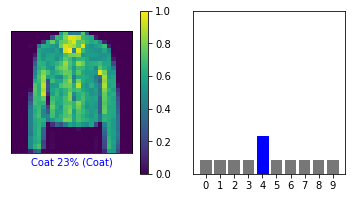

In [18]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

# **Set of weights and biases**

In [0]:
train_steps=1000
learning_rate= 0.1

W = tf.Variable(tf.random.normal([784,10] , mean=0 , stddev=1.0 , dtype=np.float32))
b = tf.Variable(tf.random.normal([10], mean=0 , stddev =1.0 , dtype=np.float32))


In [20]:

for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape() as tape:
        logits = tf.matmul(img_batch, W) + b
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logits, labels=lbl_batch))
        
    grads = tape.gradient(xent, [W, b])
    W.assign_sub(learning_rate * grads[0])
    b.assign_sub(learning_rate * grads[1])
    
    if not step % 100:
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                             tf.float32))
        print("Loss: {} Accuracy: {}".format(xent, acc))

Loss: 19.68333625793457 Accuracy: 0.0234375
Loss: 3.061208724975586 Accuracy: 0.4296875
Loss: 2.054213285446167 Accuracy: 0.6015625
Loss: 2.1246299743652344 Accuracy: 0.625
Loss: 1.733006477355957 Accuracy: 0.640625
Starting new epoch...
Loss: 1.8684029579162598 Accuracy: 0.6015625
Loss: 1.0892846584320068 Accuracy: 0.7578125
Loss: 1.7458280324935913 Accuracy: 0.65625
Loss: 1.2436912059783936 Accuracy: 0.7578125
Loss: 1.2038085460662842 Accuracy: 0.734375
Starting new epoch...


# **Testing**

In [21]:
test_preds = tf.argmax(tf.matmul(data.test_data, W) + b, axis=1,
                       output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
print(acc)

tf.Tensor(0.7095, shape=(), dtype=float32)


In [22]:
train_steps=1000
learning_rate= 0.1

W1 = tf.Variable(tf.random.normal([784,50] , mean=0 , stddev=0.1 , dtype=np.float32))
W2 = tf.Variable(tf.random.normal([50,10] , mean=0 , stddev=0.1 , dtype=np.float32))
b1 = tf.Variable(tf.random.normal([50], mean=0 , stddev =0.1 , dtype=np.float32))
b2 = tf.Variable(tf.random.normal([], mean=0 , stddev =0.1 , dtype=np.float32))

# training
for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape() as tape:
        with tf.GradientTape() as tape2:
            logits = tf.matmul(tf.nn.relu(tf.matmul(img_batch, W1) + b1),W2)+b2
            xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logits, labels=lbl_batch))
        grads2 = tape2.gradient(xent, [W2, b2])
    grads1 = tape.gradient(grads2, [W1, b1])

    W2.assign_sub(learning_rate * grads2[0])
    b2.assign_sub(learning_rate * grads2[1])
    W1.assign_sub(learning_rate * grads1[0])
    b1.assign_sub(learning_rate * grads1[1])
    
    if not step % 100:
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                             tf.float32))
        print("Loss: {} Accuracy: {}".format(xent, acc))

Loss: 2.4723620414733887 Accuracy: 0.1171875
Loss: 1.2948331832885742 Accuracy: 0.578125
Loss: 1.1132633686065674 Accuracy: 0.625
Loss: 0.9354082345962524 Accuracy: 0.734375
Loss: 1.111608862876892 Accuracy: 0.59375
Starting new epoch...
Loss: 1.0565391778945923 Accuracy: 0.625
Loss: 0.7824840545654297 Accuracy: 0.765625
Loss: 0.9100757837295532 Accuracy: 0.6875
Loss: 0.8093403577804565 Accuracy: 0.7578125
Starting new epoch...
Loss: 0.8204893469810486 Accuracy: 0.671875
